In [ ]:
import nltk
nltk.download(['punkt', 'wordnet', 'stopwords'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import re
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
import pandas as pd     
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
# nltk.download()
from nltk.corpus import stopwords # Import the stop word list

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from ast import literal_eval
from sklearn.metrics import classification_report
import seaborn as sns

# Random forest approach

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Data-240 Project/hatexplain/hatexplain_feature_extractions_v3.csv')

NameError: ignored

In [ ]:
df.head(10)

,Unnamed: 0,post_id,post_tokens,label_1,label_2,label_3,normal,offensive,hatespeech,vote,vote_ordinal,tokens,word_index_glove,lstm_feature_map,pos_tag,tfidf
0,0,1179055004553900032_twitter,"['i', 'dont', 'think', 'im', 'getting', 'my', ...",normal,normal,normal,1,0,0,normal,1,"['dont', 'think', 'get', 'babi', 'white', 'whi...",[46768 269 169 71222 298 298 10625 32...,"[-0.108053416, -0.00033172593, -0.00010766927,...","['NN', 'VBP', 'VB', 'JJ', 'JJ', 'JJ', 'NN', 'N...","[4835, 17395, 6751, 1189, 19044, 19044, 11944,..."
1,1,1179063826874032128_twitter,"['we', 'cannot', 'continue', 'calling', 'ourse...",normal,normal,normal,1,0,0,normal,1,"['continu', 'call', 'feminist', 'right', 'womx...",[ 1 580 11853 248 1 138121 1...,"[-0.1080534, -0.00033172598, -0.00010766938, 0...","['NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'VB...","[3572, 2513, 5938, 14570, 19265, 833, 169, 194..."
2,2,1178793830532956161_twitter,"['nawt', 'yall', 'niggers', 'ignoring', 'me']",normal,normal,hatespeech,1,0,1,normal,1,"['nawt', 'yall', 'nigger', 'ignor', '', '', ''...",[ 1 381085 42443 1 1 1 ...,"[-0.108053416, -0.0003317259, -0.00010766914, ...","['RB', 'RB', 'JJ', 'JJ', 'NN', 'NNP', 'NNP', '...","[11668, 19442, 11894, 8234, 0, 0, 0, 0, 0, 0, ..."
3,3,1179088797964763136_twitter,"['<user>', 'i', 'am', 'bit', 'confused', 'coz'...",hatespeech,offensive,hatespeech,0,1,1,hatespeech,3,"['bit', 'confus', 'coz', 'chines', 'ppl', 'acc...",[ 1594 1 120621 156181 65387 1122 10...,"[-0.10805343, -0.00033172604, -0.00010766927, ...","['NN', 'JJ', 'NN', 'NNS', 'JJ', 'NN', 'NN', 'N...","[1758, 3492, 3744, 2965, 13435, 98, 17995, 174..."
4,4,1179085312976445440_twitter,"['this', 'bitch', 'in', 'whataburger', 'eating...",hatespeech,hatespeech,offensive,0,1,1,hatespeech,3,"['bitch', 'whataburg', 'eat', 'burger', 'bun',...",[30619 1 3623 12203 28254 802 3214 52...,"[-0.108053416, -0.00033172598, -0.00010766916,...","['NN', 'NN', 'NN', 'NN', 'NN', 'VBP', 'JJ', 'J...","[1759, 19001, 5129, 2394, 2374, 7845, 12653, 7..."
5,5,13851720_gab,"['laura', 'loomer', 'raped', 'me', 'while', 's...",hatespeech,hatespeech,hatespeech,0,0,1,hatespeech,3,"['laura', 'loomer', 'rape', 'scream', 'disgust...",[ 5820 197313 4693 13708 18741 133579 ...,"[-0.1080534, -0.00033172598, -0.00010766927, 0...","['NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'VB...","[9744, 10154, 14046, 15172, 4635, 9395, 9681, ..."
6,6,24198545_gab,"['and', 'this', 'is', 'why', 'i', 'end', 'up',...",hatespeech,hatespeech,offensive,0,1,1,hatespeech,3,"['end', 'nigger', 'traine', 'doctor', 'speak',...",[ 156 42443 1 2082 2199 1 1492 20...,"[-0.10805342, -0.00033172578, -0.000107668995,...","['NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'JJ...","[5332, 11894, 17727, 4756, 16225, 13668, 9625,..."
7,7,14567516_gab,"['nogs', 'jews', 'and', 'dykes', 'how', 'enric...",offensive,hatespeech,offensive,0,1,1,offensive,2,"['nog', 'jew', 'dyke', 'enrich', '', '', '', '...",[109699 12471 22868 15581 1 1 ...,"[-0.108053416, -0.0003317257, -0.0001076691, 0...","['JJ', 'NN', 'NN', 'JJ', 'NNP', 'NNP', 'NNP', ...","[11999, 8970, 5086, 5380, 0, 0, 0, 0, 0, 0, 0,..."
8,8,19679648_gab,"['guilty', 'until', 'proven', 'innocent', 'unl...",hatespeech,hatespeech,normal,1,0,1,hatespeech,3,"['guilti', 'proven', 'innoc', 'jew', 'nigger',...",[ 1 5908 1 12471 42443 8410 1 ...,"[-0.1080534, -0.00033172598, -0.00010766923, 0...","['NN', 'RB', 'JJ', 'NN', 'NN', 'NN', 'NNP', 'N...","[7224, 13707, 8535, 8970, 11894, 10206, 0, 0, ..."
9,9,15858421_gab,"['tired', 'i', 'can', 'not', 'support', 'abort...",hatespeech,hatespeech,normal,1,0,1,hatespeech,3,"['tire', 'support', 'abort', 'moral', 'standpo...",[ 8813 280 31748 4011 15294 4854 ...,"[-0.108053416, -0.00033172593, -0.000107669206...","['NN', 'NN', 'RB', 'JJ', 'NN', 'NN', 'NN', 'JJ...","[17546, 16832, 54, 11257, 16420, 19194, 16832,..."


In [ ]:
hue = df[['label_1', 'label_2','label_3']].apply(
    lambda row: f"{row.label_1}, {row.label_2}, {row.label_3}", axis=1)
hue.name = 'label_1, label_2,label_3'

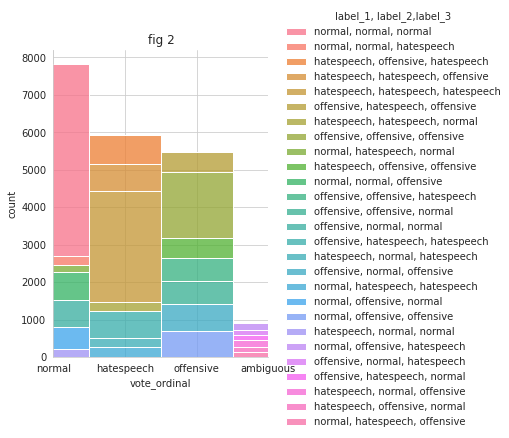

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
g = sns.displot(df,x="vote", multiple="stack",aspect=0.8,hue=hue)
#g = sns.displot(df,x="vote_ordinal", hue="label_2", multiple="stack",aspect=1)
g = (g.set_axis_labels("vote_ordinal","count").
set(xlim=(0,3)))
plt.title("fig 2")
plt.show(g)

In [ ]:
df_v = df[['label_1','label_2','label_3','vote']]

In [ ]:
df_v.isna().sum()

label_1    0
label_2    0
label_3    0
vote       0
dtype: int64

In [ ]:
df['vote_ordinal'].unique()

array([1, 3, 2, 0])

In [ ]:
df.loc[df['vote_ordinal'] ==3, 'vote_ordinal'] = 0
df.loc[df['vote_ordinal'] ==2, 'vote_ordinal'] = 0

In [ ]:
df['vote_ordinal'].unique()

array([1, 0])

In [ ]:
df1 = df[['tokens','vote_ordinal']]

In [ ]:
df1

,tokens,vote_ordinal
0,"['dont', 'think', 'get', 'babi', 'white', 'whi...",1
1,"['continu', 'call', 'feminist', 'right', 'womx...",1
2,"['nawt', 'yall', 'nigger', 'ignor', '', '', ''...",1
3,"['bit', 'confus', 'coz', 'chines', 'ppl', 'acc...",0
4,"['bitch', 'whataburg', 'eat', 'burger', 'bun',...",0
...,...,...
20143,"['twitter', 'tell', 'carlton', 'said', 'alcoho...",0
20144,"['got', 'said', 'hate', 'trump', 'consid', 'tr...",0
20145,"['macht', 'der', 'moslem', 'wenn', 'der', 'zio...",1
20146,"['aw', 'look', 'world', 'demograph', 'asian', ...",0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 500) 

## random forest using word tokens 

In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(df1["tokens"], df["vote_ordinal"], test_size = 0.3, random_state=42)

In [ ]:
X_train

11264    ['fat', 'bitch', '', '', '', '', '', '', '', '...
1991     ['great', 'victori', 'trump', 'todai', 'travel...
19361    ['thank', 'god', 'men', 'women', 'wire', 'diff...
3946     ['vontaz', 'burfict', 'fuck', 'raider', 'ain',...
1575     ['interpret', 'strong', 'black', 'man', 'mean'...
                               ...                        
11284    ['sure', 'total', 'alpha', 'faggot', 'standard...
11964    ['true', 'reason', 'asian', 'asian', 'fever', ...
5390     ['obama', 'catch', 'releas', 'abomin', 'americ...
860      ['make', 'sens', 'actual', 'point', 'peopl', '...
15795    ['rape', 'russian', 'rape', 'mohammedan', 'com...
Name: tokens, Length: 14103, dtype: object

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(14103, 500)


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(6045, 500)


In [ ]:
vocab = vectorizer.get_feature_names()
print(f"Printing first 100 vocabulary samples:\n{vocab[:100]}")

Printing first 100 vocabulary samples:
['abort', 'abus', 'accept', 'account', 'act', 'actual', 'africa', 'african', 'ago', 'agre', 'ain', 'alien', 'allow', 'alt', 'america', 'american', 'anim', 'anti', 'antifa', 'arab', 'asian', 'ask', 'ass', 'asshol', 'attack', 'awai', 'babi', 'bad', 'ball', 'ban', 'base', 'basic', 'beaner', 'beat', 'believ', 'best', 'bet', 'better', 'big', 'bit', 'bitch', 'black', 'blame', 'boi', 'book', 'border', 'brain', 'break', 'bring', 'british', 'bro', 'brother', 'brown', 'bui', 'build', 'bullshit', 'bunch', 'busi', 'call', 'came', 'car', 'care', 'case', 'caus', 'chang', 'charg', 'check', 'child', 'children', 'christian', 'church', 'citi', 'citizen', 'civil', 'claim', 'class', 'color', 'come', 'comment', 'commun', 'communist', 'complet', 'conserv', 'consid', 'control', 'coon', 'cop', 'countri', 'cours', 'crazi', 'creat', 'crime', 'crimin', 'cuck', 'cultur', 'cunt', 'cut', 'dai', 'damn', 'date']


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
distribution = np.sum(X_train, axis=0)

print("Printing first 100 vocab-dist pairs:")

for tag, count in zip(vocab[:100], distribution[:100]):
    print(count, tag)

Printing first 100 vocab-dist pairs:
56 abort
70 abus
83 accept
66 account
143 act
228 actual
106 africa
111 african
107 ago
72 agre
89 ain
129 alien
152 allow
87 alt
277 america
289 american
71 anim
190 anti
68 antifa
265 arab
353 asian
167 ask
404 ass
63 asshol
205 attack
107 awai
142 babi
190 bad
55 ball
171 ban
73 base
65 basic
81 beaner
96 beat
198 believ
113 best
65 bet
200 better
138 big
68 bit
919 bitch
943 black
109 blame
257 boi
56 book
62 border
58 brain
62 break
127 bring
59 british
82 bro
57 brother
80 brown
63 bui
70 build
74 bullshit
77 bunch
74 busi
406 call
80 came
61 car
202 care
72 case
165 caus
127 chang
62 charg
68 check
108 child
203 children
238 christian
63 church
115 citi
77 citizen
101 civil
105 claim
69 class
61 color
380 come
66 comment
130 commun
66 communist
69 complet
70 conserv
67 consid
105 control
72 coon
85 cop
539 countri
73 cours
66 crazi
96 creat
127 crime
79 crimin
115 cuck
164 cultur
104 cunt
65 cut
313 dai
101 damn
56 date


In [ ]:
forest = RandomForestClassifier() 
forest = forest.fit( X_train, Y_train)

In [ ]:
predictions = forest.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.708354011579818


In [ ]:
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76      3686
           1       0.63      0.61      0.62      2359

    accuracy                           0.71      6045
   macro avg       0.69      0.69      0.69      6045
weighted avg       0.71      0.71      0.71      6045



## random forest using word2vec tokens

In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(df["word_index_glove"], df["vote_ordinal"], test_size = 0.3, random_state=42)

In [ ]:
X_train

11264    [ 3747 30619     1     1     1     1     1    ...
1991     [   353      1  10468 388989   1143   1365   1...
19361    [  5551   1533    301    266   4854   9633    ...
3946     [    1     1 35690 26164 25221  4927     1 443...
1575     [14093   562   521   300  1702  1816   298    ...
                               ...                        
11284    [  1085    477   8546 100563   1224      1    ...
11964    [1446 1247  967  967 6344 4603    1    1    1 ...
5390     [ 765 3161    1    1  453  765  257    1  140 ...
860      [   159  79038   3570    389      1 381444    ...
15795    [  4693    467   4693 113230    326    173  26...
Name: word_index_glove, Length: 14103, dtype: object

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(14103, 500)


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(6045, 500)


In [ ]:
forest = RandomForestClassifier() 
forest = forest.fit( X_train, Y_train)

In [ ]:
predictions = forest.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.6994210090984284


In [ ]:
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3686
           1       0.62      0.58      0.60      2359

    accuracy                           0.70      6045
   macro avg       0.68      0.68      0.68      6045
weighted avg       0.70      0.70      0.70      6045



## Randoms forest using tfidf

In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(df["tfidf"], df["vote_ordinal"], test_size = 0.3, random_state=42)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(14103, 500)


In [ ]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(6045, 500)


In [ ]:
forest = RandomForestClassifier() 
forest = forest.fit( X_train, Y_train)

In [ ]:
predictions = forest.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.7128205128205128


In [ ]:
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      3686
           1       0.64      0.61      0.62      2359

    accuracy                           0.71      6045
   macro avg       0.70      0.69      0.70      6045
weighted avg       0.71      0.71      0.71      6045



## Randoms forest using LSTM

In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(df["lstm_feature_map"], df["vote_ordinal"], test_size = 0.3, random_state=42)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(14103, 500)


In [ ]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(6045, 500)


In [ ]:
forest = RandomForestClassifier() 
forest = forest.fit( X_train, Y_train)

In [ ]:
predictions = forest.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.5536807278742762


In [ ]:
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

           0       0.61      0.74      0.67      3686
           1       0.39      0.26      0.31      2359

    accuracy                           0.55      6045
   macro avg       0.50      0.50      0.49      6045
weighted avg       0.52      0.55      0.53      6045



## Randoms forest using Multiple features

In [ ]:
X_train1, X_cv1, Y_train, Y_cv = train_test_split(df[["word_index_glove","tfidf"]], df["vote_ordinal"], test_size = 0.3, random_state=42)

In [ ]:
X_train1

,word_index_glove,tfidf
11264,[ 3747 30619 1 1 1 1 1 ...,"[5842, 1759, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1991,[ 353 1 10468 388989 1143 1365 1...,"[7097, 18580, 17863, 17582, 17761, 1297, 5191,..."
19361,[ 5551 1533 301 266 4854 9633 ...,"[17301, 6908, 10796, 19260, 19194, 4528, 10388..."
3946,[ 1 1 35690 26164 25221 4927 1 443...,"[18691, 2392, 6420, 13983, 346, 10040, 8104, 7..."
1575,[14093 562 521 300 1702 1816 298 ...,"[8629, 16627, 1786, 10437, 10702, 6194, 19044,..."
...,...,...
11284,[ 1085 477 8546 100563 1224 1 ...,"[16849, 17664, 484, 5732, 16418, 6435, 0, 0, 0..."
11964,[1446 1247 967 967 6344 4603 1 1 1 ...,"[17853, 14151, 933, 933, 5967, 4960, 0, 0, 0, ..."
5390,[ 765 3161 1 1 453 765 257 1 140 ...,"[12182, 2696, 14313, 52, 543, 12182, 7636, 144..."
860,[ 159 79038 3570 389 1 381444 ...,"[10388, 15295, 149, 13270, 12903, 13418, 13522..."


In [ ]:
X_train=[]
X_train = X_train1["word_index_glove"] + X_train1["tfidf"]

In [ ]:
X_cv=[]
X_cv = X_cv1["word_index_glove"] + X_cv1["tfidf"]

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(14103, 500)


In [ ]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(6045, 500)


In [ ]:
forest = RandomForestClassifier() 
forest = forest.fit( X_train, Y_train)

In [ ]:
predictions = forest.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.6971050454921423


In [ ]:
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76      3686
           1       0.62      0.57      0.60      2359

    accuracy                           0.70      6045
   macro avg       0.68      0.67      0.68      6045
weighted avg       0.69      0.70      0.69      6045



## Using NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train, X_cv, Y_train, Y_cv = train_test_split(df["tfidf"], df["vote_ordinal"], test_size = 0.3, random_state=42)

In [ ]:
X_train = vectorizer.fit_transform(X_train)
X_train = X_train.toarray()
print(X_train.shape)

(14103, 500)


In [ ]:
X_cv = vectorizer.transform(X_cv)
X_cv = X_cv.toarray()
print(X_cv.shape)

(6045, 500)


In [ ]:
clf = MultinomialNB() 
clf = clf.fit( X_train, Y_train)

In [ ]:
predictions = clf.predict(X_cv) 
print("Accuracy: ", accuracy_score(Y_cv, predictions))

Accuracy:  0.689660876757651


In [ ]:
print(classification_report(Y_cv, predictions))

              precision    recall  f1-score   support

           0       0.73      0.77      0.75      3686
           1       0.61      0.56      0.58      2359

    accuracy                           0.69      6045
   macro avg       0.67      0.67      0.67      6045
weighted avg       0.69      0.69      0.69      6045

